# CASE STUDY - CREDIT CARD SEGMENTATION

In [45]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=16)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Load the data
cc_data = pd.read_csv( 'CC GENERAL.csv' )

## EDA (Exploratory Data Analysis)

In [3]:
cc_data.shape

(8950, 18)

In [4]:
cc_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
cc_data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


The data summarizes the CC usage behavior of 8950 active credit card holders for a 6 months period, with 18 behavioral variables.

In [7]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
cc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


1. Monthly Average Balance is about 1500 with 50% of the customers maintaining MAB well below the mean and the top 25% customers maintaining MAB of above 2000. This indicates that the data is skewed towards thw 25% high spending customers
2. This can also be seen in the last 12 months purchase spends where the top 25% customers have made high value purchases
3. Cash Advances have contributed most towards the Credit Card Spends
4. Only 25% customers are making atleast 1 purchase every month
5. Installments purchases are the most frequent
6. Median credit limit is 3000 and mean credit card limit is ~4500
7. Average minimum due is ~864 and average payments done is ~1700. Looks like most customers are paying more than the minimum due
8. However, full payment is very rare and 75% customers haven't done full payment in this period
9. An average customer is at least an year old

In [9]:
# check for missing values
cc_data.isnull().any().sum()

2

In [12]:
cc_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

1. We have 1 missing value under CREDIT_LIMIT. We can impute the same with median
2. We have 313 missing values under MINIMUM_PAYMENTS. We will impute these with 25%*PAYMENTS

In [13]:
# impute missing values
cc_data.CREDIT_LIMIT.fillna(cc_data.CREDIT_LIMIT.mean(), inplace=True)

In [15]:
cc_data.MINIMUM_PAYMENTS.fillna(0.25*cc_data.PAYMENTS, inplace=True)

In [16]:
cc_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Derived Features: New Calculated KPIs

In [17]:
cc_data['MONTHLY_AVG_PURCHASE'] = cc_data['PURCHASES']/cc_data['TENURE']
cc_data['MONTHLY_AVG_CASH_ADVANCE'] = cc_data['CASH_ADVANCE']/cc_data['TENURE']
cc_data['PURCHASE_COUNT_BY_TYPE_ONE_OFF'] = np.where(cc_data['ONEOFF_PURCHASES']>0,1,0)
cc_data['PURCHASE_COUNT_BY_TYPE_INSTALLMENT'] = np.where(cc_data['INSTALLMENTS_PURCHASES']>0,1,0)
cc_data['PURCHASE_COUNT_BY_TYPE_BOTH'] = np.where(cc_data['PURCHASE_COUNT_BY_TYPE_ONE_OFF']+cc_data['PURCHASE_COUNT_BY_TYPE_INSTALLMENT'] > 2,1,0)
cc_data['CASH_ADVANCE_COUNT'] = np.where(cc_data['CASH_ADVANCE']>0,1,0)
cc_data['LIMIT_USAGE'] = np.where(cc_data['CREDIT_LIMIT']== 0, 0,cc_data['BALANCE']/cc_data['CREDIT_LIMIT'])
cc_data['PAYMENT_RATIO'] = np.where(cc_data['MINIMUM_PAYMENTS']== 0, 0, cc_data['PAYMENTS']/cc_data['MINIMUM_PAYMENTS'])

In [18]:
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_COUNT_BY_TYPE_ONE_OFF,PURCHASE_COUNT_BY_TYPE_INSTALLMENT,PURCHASE_COUNT_BY_TYPE_BOTH,CASH_ADVANCE_COUNT,LIMIT_USAGE,PAYMENT_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.000000,12,7.950000,0.000000,0,1,0,0,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.222222,12,0.000000,536.912124,0,0,0,1,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,12,64.430833,0.000000,1,0,0,0,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,12,124.916667,17.149001,1,0,0,1,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.000000,12,1.333333,0.000000,1,0,0,0,0.681429,2.771075


In [35]:
# slice the data frame to include the important features
cc_final_data = cc_data.iloc[:,[11,12,18,19,20,21,22,23,24,25]]
cc_final_data.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_COUNT_BY_TYPE_ONE_OFF,PURCHASE_COUNT_BY_TYPE_INSTALLMENT,PURCHASE_COUNT_BY_TYPE_BOTH,CASH_ADVANCE_COUNT,LIMIT_USAGE,PAYMENT_RATIO
0,0,2,7.950000,0.000000,0,1,0,0,0.040901,1.446508
1,4,0,0.000000,536.912124,0,0,0,1,0.457495,3.826241
2,0,12,64.430833,0.000000,1,0,0,0,0.332687,0.991682
3,1,1,124.916667,17.149001,1,0,0,1,0.222223,0.000000
4,0,1,1.333333,0.000000,1,0,0,0,0.681429,2.771075


In [38]:
cc_final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CASH_ADVANCE_TRX,8950.0,3.248827,6.824647,0.0,0.000000,0.000000,4.000000,123.000000
PURCHASES_TRX,8950.0,14.709832,24.857649,0.0,1.000000,7.000000,17.000000,358.000000
MONTHLY_AVG_PURCHASE,8950.0,86.175173,180.508787,0.0,3.399375,31.936667,97.228333,4086.630833
MONTHLY_AVG_CASH_ADVANCE,8950.0,88.977984,193.136115,0.0,0.000000,0.000000,99.085196,3928.100980
PURCHASE_COUNT_BY_TYPE_ONE_OFF,8950.0,0.519330,0.499654,0.0,0.000000,1.000000,1.000000,1.000000
PURCHASE_COUNT_BY_TYPE_INSTALLMENT,8950.0,0.562458,0.496111,0.0,0.000000,1.000000,1.000000,1.000000
PURCHASE_COUNT_BY_TYPE_BOTH,8950.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_COUNT,8950.0,0.482905,0.499736,0.0,0.000000,0.000000,1.000000,1.000000
LIMIT_USAGE,8950.0,0.388883,0.389722,0.0,0.041494,0.302720,0.717571,15.909951
PAYMENT_RATIO,8950.0,9.055705,118.175158,0.0,0.920843,2.076749,6.027054,6840.528861


1. The top 25% customers are spending equally on both purchases and cash advances
2. Most customers are using the credit card only for making purchases and only 25% of the customers account for cash advance transactions
3. However, the average spend on purchases and cash advances are almost equal
4. One off purchases and installment purchases are almost equal in numbers
5. However, no customer has done both the one-off purchase and installment purchase
6. An average customer is using 30-40% of their total credit limit, however only 25% customers go above 70% limit usage
7. Payment ratio is positive indicating that the customers are mostly paying over and above the minimum due

## PCA (Principal Component Analysis)

In [41]:
# drop Customer ID
cc_data.drop(['CUST_ID'], axis=1, inplace=True)
cc_data.shape

(8950, 25)

Text(0,0.5,'Cummulative Explained Variance Ratio')

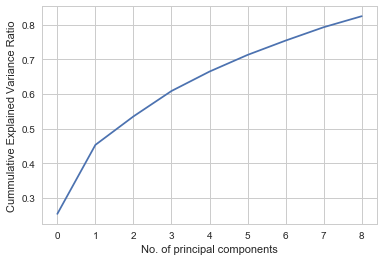

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(cc_data)
from sklearn.decomposition import PCA
pc = PCA(n_components=9).fit(sc)
p = Series(pc.explained_variance_ratio_.cumsum()).plot()
p.set_xlabel('No. of principal components')
p.set_ylabel('Cummulative Explained Variance Ratio')

8 Principal Components explain over 80% variance

Text(0,0.5,'PC2')

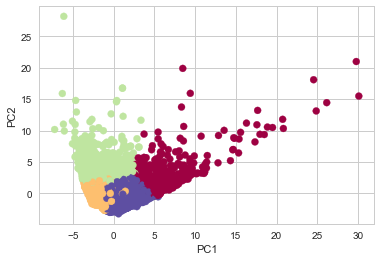

In [54]:
pc = PCA(n_components=8, random_state=125).fit_transform(sc)
from sklearn.cluster import KMeans, DBSCAN
km = KMeans(n_clusters=4, random_state=777).fit(pc)
plt.scatter(pc[:,0], pc[:,1], c=km.labels_, cmap='Spectral')
plt.xlabel('PC1')
plt.ylabel('PC2')

4 clusters on PC1 vs. PC2 plane

### Selecting the Optimum no. of Clusters

In [53]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

#### Silhoutte Score

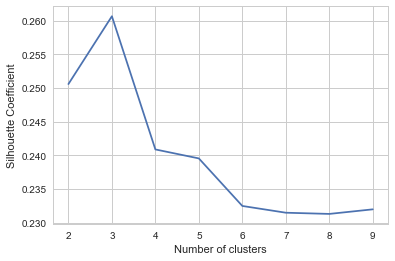

In [56]:
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=7)
    km.fit_transform(pc)
    scores.append(silhouette_score(pc,km.labels_))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### Calinski Harabaz Score

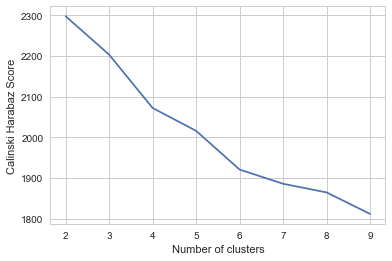

In [57]:
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(calinski_harabaz_score(pc,km.labels_))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabaz Score')
plt.grid(True)

#### Check the inertia or within-cluster sum-of-squares

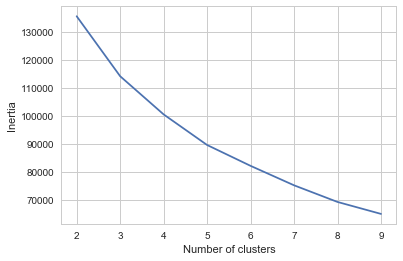

In [58]:
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(km.inertia_)
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

### Based on the above scores, we can pick k=3

### k=3

In [89]:
km = KMeans(n_clusters=3, random_state=777).fit(pc)
cc_final_data['cluster']=km.labels_
cc_final_data.groupby('cluster').mean().T

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cluster,0,1,2
CASH_ADVANCE_TRX,3.096591,0.424691,7.334022
PURCHASES_TRX,71.464489,14.494033,3.219433
MONTHLY_AVG_PURCHASE,499.692909,72.302123,20.110948
MONTHLY_AVG_CASH_ADVANCE,89.912221,8.757159,203.926449
PURCHASE_COUNT_BY_TYPE_ONE_OFF,0.975852,0.593827,0.317484
PURCHASE_COUNT_BY_TYPE_INSTALLMENT,0.927557,0.775103,0.181335
PURCHASE_COUNT_BY_TYPE_BOTH,0.000000,0.000000,0.000000
CASH_ADVANCE_COUNT,0.357955,0.146296,0.992026
LIMIT_USAGE,0.373572,0.247613,0.594836
PAYMENT_RATIO,12.498437,9.958046,7.044758


In [90]:
# No. of customers in the clusters
cc_final_data['cluster'].value_counts()

1    4860
2    3386
0     704
Name: cluster, dtype: int64

# Conclusion (Cluster Analysis)

### 1. Cluster/Segment 1:
    
    1.1 Makes high value purchases
    
    1.2 Highest monthly average purchase
    
    1.3 Decent cash advance usage
    
    1.4 Most purchases in both one-off as well as installment purchases
    
    1.5 Utilizes on an average ~37% of the limit
    
    1.6 Tries to settle their dues faster by making high payments over & above the minimum due

### 2. Cluster/Segment 2:
    
    2.1 Low Cash Advance utilization
    
    2.2 Makes average value purchases
    
    2.3 Does more installment type purchases
    
    2.4 Utilizes only ~25% (avg.) of their credit limit
    
    2.5 Pays over and above the minimum due

### 3. Cluster/Segment 3:
    
    3.1 Highest number of Cash Advance utilization
    
    3.2 Highest Average Cash Advance balance
    
    3.3 Every customer in this cluster utilizes Cash Advance facility
    
    3.4 Utiizes ~60% (avg.) of the credit limit
    
    3.5 However, pays back over & above the minimum due

### Key Visualizations

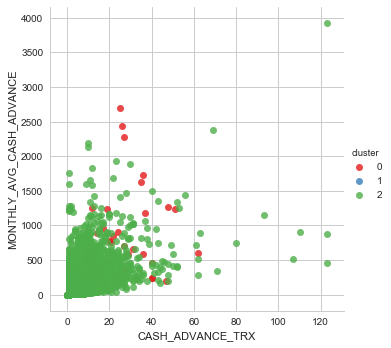

In [93]:
sns.lmplot(x = "CASH_ADVANCE_TRX", y = 'MONTHLY_AVG_CASH_ADVANCE', data = cc_final_data, hue = "cluster", 
           palette="Set1", fit_reg = False)

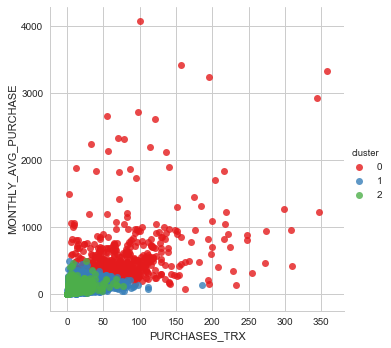

In [94]:
sns.lmplot(x = "PURCHASES_TRX", y = 'MONTHLY_AVG_PURCHASE', data = cc_final_data, hue = "cluster", 
           palette="Set1", fit_reg = False)

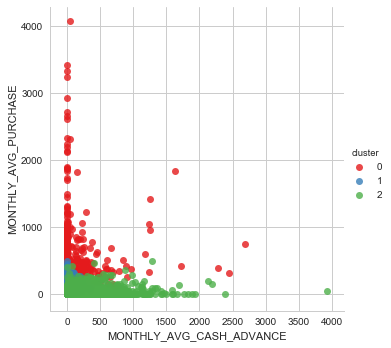

In [99]:
sns.lmplot(x = "MONTHLY_AVG_CASH_ADVANCE", y = 'MONTHLY_AVG_PURCHASE', data = cc_final_data, hue = "cluster", 
           palette="Set1", fit_reg = False)

# Strategic Insights

### For Cluster 1 : 
1) To enhance their cash utilization we can look at reducing their interest rate on cash withdrawals 

2) Reduce their interest rate on conversion of a purchse to monthly emis as this will up their chances of converting purchases to emis and not be in a hurry to pay them off. This in turn will indirectly increase their buying power and the chances of them spending more on their card 

3) Since they tend to spend more we should look at a good monthly reward system for purchases over a certain amount. The reward must be highly tangible to motivate this set to be loyal to our card 

4) These people pay more than the minimum due and that too on time : - can we look at waiving off fine on exceeding due date by say 15 days ? this will give them more time and allow us to earn more interest

### For Cluster 2 : 
1) Again we should look at reducing interest on cash utilization to enhance their cash withdrawals 

2) Reduce the interest on installment conversions for the same logic as applicable for Cluster 1 

3) Once they have converted their purchase to say 6 installments : can we look at giving them the offer to convert to 9 or say 12 for no additional charges and there by further free up their credit limit in a way which is rewarding to them and good for us as their chances to spend more go up 

4) Reward program on spending upwards of a certain amount

### For Cluster 3 : 
1) Increase their cash utilization limit to allow them to withdraw more cash 

2) Reward program of cash back type on withdrawing more than a certain amount 

3) Again waiver of fine on due date exceedance by say 15 days to let them withdraw freely and pay when they can which allows us to earn more interest from them and gives them the time and flexibility they need 

4) Increase the daily cash allowance limit and also allow them to club the cash allowance limit of two months on special request and a slightly higher interest rate